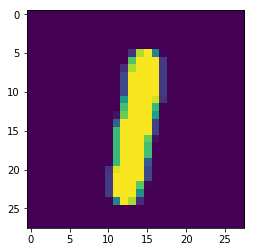

1.0
Model Accuracy = 0.941372529414


AttributeError: 'ExtraTreesClassifier' object has no attribute 'coef_'

In [18]:
from sklearn.datasets.mldata import fetch_mldata
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Cross-Validation Class
#Here K-folds cross validation is used 
class Cross_validation():
    folds = 0; 
    X = 0;
    y= 0; 
    skfold = 0; 
    model = 0;
    # Costructor 
    def __init__(self, no_of_folds, input_vector, label_vector, model):
        self.folds = no_of_folds;
        self.X = input_vector; 
        self.y = label_vector; 
        self.model = model; 
        self.skfold = StratifiedKFold(n_splits= self.folds, random_state= 43); 
        return; 
        
    # Method to model the model with the best set of inputs from k set of inputs
    def fit(self):
        coeff = 0; 
        new_score = 0;
        old_score = 0; 
        for train_index, test_index in self.skfold.split(self.X, self.y):
           Train_x = self.X[train_index]; 
           Test_x = self.X[test_index]; 
           Train_y = self.y[train_index];
           Test_y  = self.y[test_index];
           
           self.model.fit(Train_x, Train_y); 
           pred_y = self.predict(Test_x);
           new_score = self.score(Test_y, pred_y); 
           print('Model Accuracy = '+str(new_score)); 
           
           #if the new model is not as good as the old one 
           if(old_score < new_score):
               #storing old coefficients to roll back to the best model
               coeff = self.model.coef_;
               old_score = new_score;
               
        self.model.coef_ = coeff;
        return; 
    
    # Method to predict the class of the data
    def predict(self,Test_x):  
        pred_y = self.model.predict(Test_x);
        return pred_y; 
    
    # Method to print the Permonace of the Model 
    def score(self, desired_y, pred_y):
        ncorrect = sum(pred_y == desired_y);
        score = ncorrect/ len(pred_y);
        return score;
    
dataset = fetch_mldata('MNIST original')

#Importing the Data from the dataset 
X = dataset["data"];
y = dataset["target"]; 

#Printing random image at 10062 position to verify the data fetch was successful or not 
element_num  = 10062
temp = X[element_num].reshape(28,28)
plt.imshow(temp)
plt.show()
print(y[element_num])              #Printing the label associated with the prinnted image 

#Separating the trainig and test data 
Train_X = X[:60000]; 
Train_y = y[:60000];
Test_X  = X[60000:]; 
Test_y  = y[60000:]; 

#Training data and the test data are separetd properly, 
#We dont need to worry about them. But as we are going to perform a cross-validation on the tranning set 
#lets make shufful it so that the data gets equally distributed and none of the data digits escape any of the 
#validation set or the traning set, as some algorithm only performs well on the equally distributed data. 
reviced_index = np.random.permutation(Train_X.shape[0])
Train_X, Train_y = Train_X[reviced_index], Train_y[reviced_index]

#Training the Model with the SGD Classifier 
ML_model = ExtraTreesClassifier(n_estimators=10, max_depth=None,
           min_samples_split=2, random_state=0) 

# Cross Validation for predicting training error
#No of K = 2; 
cross_val = Cross_validation(2, Train_X, Train_y, model= ML_model);
cross_val.fit()
Train_pred_y = cross_val.predict(Train_X);
print('Traning Accuracy is = ' + str(cross_val.score(Train_y, Train_pred_y) * 100) + '%')

# Test Error calculation 
Test_pred_y = ML_model.predict(Test_X);
test_accuracy = sum(Test_pred_y == Test_y); 
print('Generalization Accuracy = ' + str(test_accuracy/len(Test_pred_y) * 100)+ '%');
 
#Confusion Matrix 
conf_mat = confusion_matrix(Test_y, Test_pred_y)
print('****************Confusion Matrix*******************')
print(conf_mat)

